**Handling the unbalanced dataset with the SMOTE Method**

In [ ]:
import numpy as np
import pandas as pd
#Importing the libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210013.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000,210012.000000
mean,73737.509878,-0.085703,-0.002471,0.265572,0.063072,-0.091151,0.040804,-0.040030,0.011901,0.007007,-0.007560,0.107046,-0.059695,0.028814,0.042449,0.070533,-0.006206,0.021331,-0.029421,-0.011261,0.015887,-0.011627,-0.037288,-0.013747,0.003126,0.051676,0.004613,0.001043,0.001568,89.951723,0.001876
std,36513.266525,1.907570,1.629480,1.465058,1.403075,1.363654,1.314757,1.218114,1.203974,1.130707,1.093706,1.037700,1.078298,1.027523,0.969073,0.940218,0.885588,0.883539,0.840121,0.819277,0.755922,0.735653,0.697612,0.617554,0.604496,0.498516,0.487684,0.395146,0.318274,248.087723,0.043273
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-25.222345,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,45489.000000,-0.955127,-0.587401,-0.428764,-0.805003,-0.769694,-0.718087,-0.572324,-0.186724,-0.661958,-0.521127,-0.650146,-0.468485,-0.646256,-0.374989,-0.521818,-0.477982,-0.447991,-0.516765,-0.485120,-0.197842,-0.226297,-0.535085,-0.168195,-0.344903,-0.253835,-0.331420,-0.068170,-0.044455,5.990000,0.000000
50%,69325.000000,-0.062899,0.076713,0.445943,0.063919,-0.150262,-0.225473,-0.001614,0.039117,-0.071405,-0.097607,0.054214,0.115258,0.006848,0.071351,0.154510,0.060709,-0.039037,-0.032191,-0.010749,-0.046912,-0.039727,-0.025132,-0.026832,0.050656,0.092614,-0.061362,0.004968,0.017487,23.000000,0.000000
75%,110010.000000,1.225287,0.781543,1.194398,0.866750,0.492869,0.440468,0.515107,0.335470,0.621224,0.446790,0.878736,0.612188,0.701079,0.510960,0.752945,0.529143,0.415858,0.465499,0.468873,0.147843,0.157789,0.443546,0.119421,0.424135,0.380435,0.258253,0.089003,0.077898,79.580000,0.000000
max,137803.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.shape

(210013, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df1[df1['Class']==1].shape

(394, 31)

In [ ]:
df1[df1['Class']==0].shape

(209618, 31)

In [ ]:
#Hadling the duplicated values
df1[df1['Class']==1].duplicated().sum()

18

In [ ]:
df1[df1['Class']==0].duplicated().sum()

725

In [ ]:
df1[(df1['Class']==1) &(df1['Class'].duplicated())]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203700,134928.0,1.204934,3.238070,-6.010324,5.720847,1.548400,-2.321064,-0.781880,0.076619,-2.976249,-4.070257,3.394152,-4.547742,-0.063634,-10.516465,0.053267,0.204080,0.462929,0.841169,-2.221384,0.338161,0.098341,-0.845866,-0.031228,0.421146,0.388361,0.056035,0.491828,0.340847,0.00,1.0
204064,135095.0,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,-3.520128,2.074116,-3.010772,0.694978,-5.387831,1.778670,-2.935804,-2.285573,-0.237056,1.979747,1.141615,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,345.00,1.0
204079,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,-0.989431,-0.491112,0.903819,1.366524,-1.886162,-0.194861,0.086837,0.978546,0.055604,0.189131,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51,1.0
204503,135314.0,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,-1.660183,-3.841098,3.282825,-3.906877,0.951368,-4.898183,-0.552000,-4.787448,-9.334329,-2.580249,1.501573,-0.022590,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,84.28,1.0


In [ ]:
df1=df1.drop('Time',axis=1)

In [ ]:
duplicate_rows = df1.duplicated()
duplicate_data = df1[duplicate_rows]
print(duplicate_data)

              V1        V2        V3        V4        V5        V6        V7  \
33     -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  0.711206   
35     -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983  0.693039   
113     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
114     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
115     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
...          ...       ...       ...       ...       ...       ...       ...   
209827  2.148813 -0.074116 -2.573260 -0.337782  1.000894 -0.596484  0.502468   
209854  2.041582 -0.142444 -1.187232  0.229840  0.029057 -0.717056  0.043914   
209860  2.026398 -0.103735 -1.177805  0.227797  0.100902 -0.692796  0.115562   
209953  2.069888  0.103314 -3.383302  0.107624  3.168126  2.978724  0.238397   
210004  2.148813 -0.074116 -2.573260 -0.337782  1.000894 -0.596484  0.502468   

              V8        V9       V10   

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
#Standardization of the Amount Column
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
df1['Amount']=sc.fit_transform(df1[['Amount']])

<Axes: xlabel='Class', ylabel='count'>

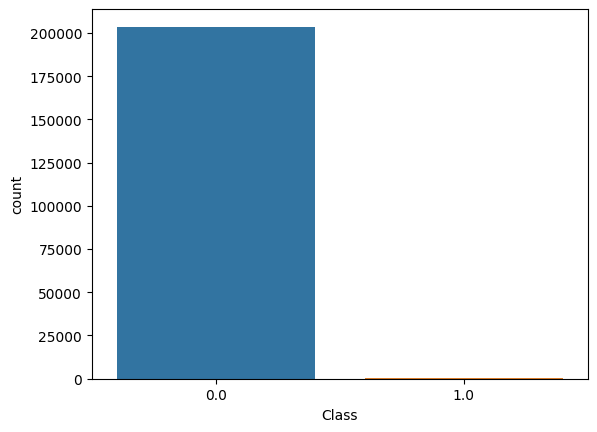

In [ ]:
#Visulization of count of Class
sb.countplot(x='Class',data=df1)

In [ ]:
#Taking dependent and independent variable
x=df1.drop('Class',axis=1)
y=df1['Class']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

In [ ]:
#oversampling for imbalance dataset
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE()

In [ ]:
x_res,y_res=sm.fit_resample(x,y)

In [ ]:
y_res.value_counts()

0.0    203593
1.0    203593
Name: Class, dtype: int64

In [ ]:
#Dividing the dataset into train and test
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
#Performing the dataset into ml model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rfc.score(xtest,ytest)

0.9999099512099283

In [ ]:
ypred=rfc.predict(xtest)
#Checking accuracy,f1,precission,recall
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61337
         1.0       1.00      1.00      1.00     60819

    accuracy                           1.00    122156
   macro avg       1.00      1.00      1.00    122156
weighted avg       1.00      1.00      1.00    122156



In [ ]:
accuracy_score(ytest,ypred)

0.9999099512099283